Mounted at /content/drive

Samples per class in Training Set:
F: 19869
N: 48017
S: 33772
V: 33021

Samples per class in Testing Set:
F: 6611
N: 16093
S: 11044
V: 11145


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6743 - loss: 2.4974 - val_accuracy: 0.8799 - val_loss: 1.3217
Epoch 2/40
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8639 - loss: 1.2393 - val_accuracy: 0.9144 - val_loss: 0.8521
Epoch 3/40
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8956 - loss: 0.8445 - val_accuracy: 0.9287 - val_loss: 0.6336
Epoch 4/40
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9122 - loss: 0.6441 - val_accuracy: 0.9375 - val_loss: 0.5077
Epoch 5/40
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9214 - loss: 0.5231 - val_accuracy: 0.9416 - val_loss: 0.4210
Epoch 6/40
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9306 - loss: 0.4372 - val_accuracy: 0.9446 - val_loss: 0.3614
Epoch 7/40
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9334 - loss: 0.3810 - val_accuracy: 0.9469 - val_loss: 0.3164
Epoch 8/40
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9390 - loss: 0.3323

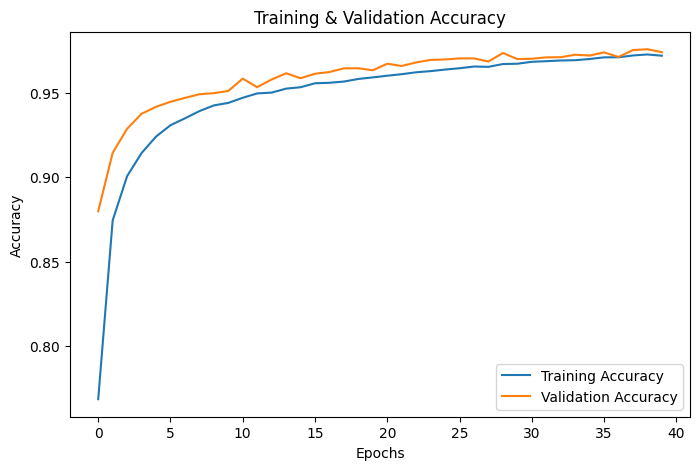

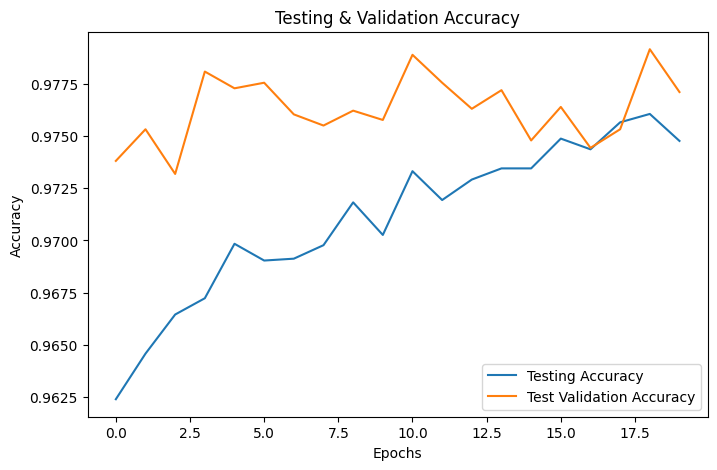

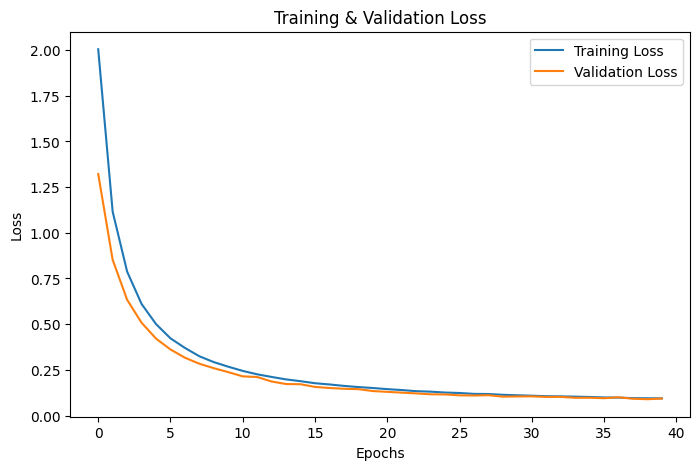

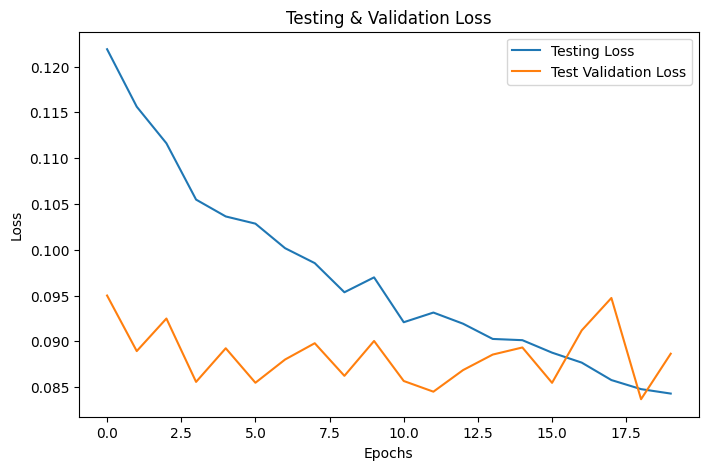

4209/4209 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


<Figure size 600x500 with 0 Axes>

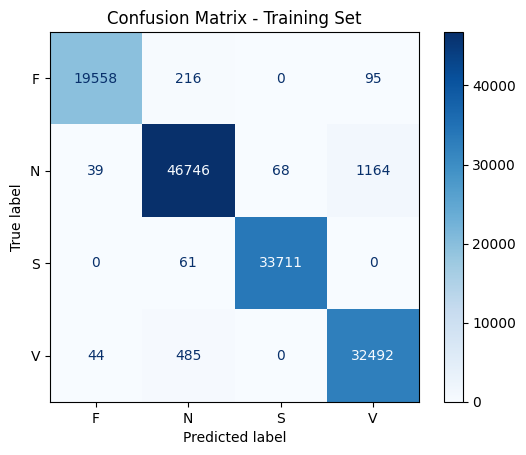

1403/1403 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


<Figure size 600x500 with 0 Axes>

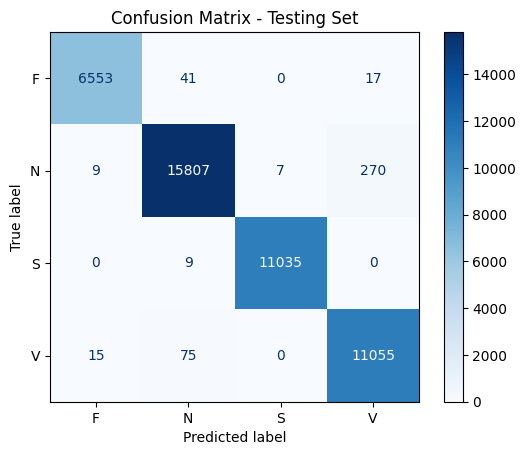

Classification Report - Training Set
              precision    recall  f1-score   support

           F       1.00      0.98      0.99     19869
           N       0.98      0.97      0.98     48017
           S       1.00      1.00      1.00     33772
           V       0.96      0.98      0.97     33021

    accuracy                           0.98    134679
   macro avg       0.99      0.99      0.99    134679
weighted avg       0.98      0.98      0.98    134679

Classification Report - Testing Set
              precision    recall  f1-score   support

           F       1.00      0.99      0.99      6611
           N       0.99      0.98      0.99     16093
           S       1.00      1.00      1.00     11044
           V       0.97      0.99      0.98     11145

    accuracy                           0.99     44893
   macro avg       0.99      0.99      0.99     44893
weighted avg       0.99      0.99      0.99     44893

1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


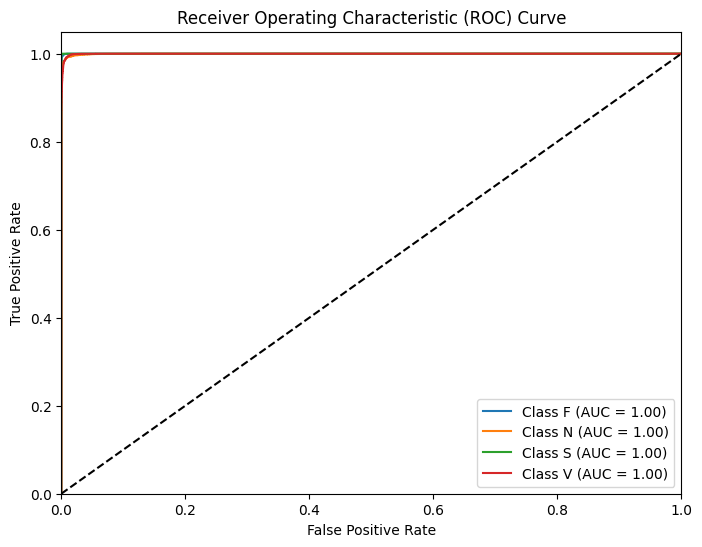

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import the necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import os
import matplotlib.pyplot as plt  # For plotting

# Step 3: Set the directory where preprocessed data is stored
save_dir = "/content/drive/MyDrive/data"

# Initialize lists to store heartbeats and labels
heartbeats = []
labels = []

# Load all records and ensure heartbeats and labels are consistent
for file in os.listdir(save_dir):
    if file.endswith('heartbeats.npy'):
        record_num = file.split('-')[0]
        record_heartbeats = np.load(os.path.join(save_dir, f'{record_num}-heartbeats.npy'))
        record_labels = np.load(os.path.join(save_dir, f'{record_num}-labels.npy'))
        if len(record_heartbeats) == len(record_labels):
            heartbeats.extend(record_heartbeats)
            labels.extend(record_labels)
        else:
            print(f"Inconsistent data in record {record_num}")

heartbeats = np.array(heartbeats)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
heartbeats, labels_encoded = shuffle(heartbeats, labels_encoded, random_state=42)

# Step 4: Data Splitting (75% train, 25% test)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(heartbeats, labels_encoded, test_size=0.25, random_state=42)

# 80% of 75% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 80% of 25% for testing, 20% for testing validation
X_test, X_test_val_final, y_test, y_test_val_final = train_test_split(X_test_val, y_test_val, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test_val_final = X_test_val_final.reshape((X_test_val_final.shape[0], X_test_val_final.shape[1], 1))

# Print number of samples per class in training and testing sets
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True)

print("\nSamples per class in Training Set:")
for label, count in zip(train_counts[0], train_counts[1]):
    print(f"{label_encoder.classes_[label]}: {count}")

print("\nSamples per class in Testing Set:")
for label, count in zip(test_counts[0], test_counts[1]):
    print(f"{label_encoder.classes_[label]}: {count}")

# Step 5: Define the 1D CNN model
model = Sequential([
    Conv1D(64, 5, activation='relu', input_shape=(180, 1), kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(48, 3, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels_encoded)), activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

history_test = model.fit(X_test, y_test, epochs=20, batch_size=64, validation_data=(X_test_val_final, y_test_val_final), callbacks=[early_stopping])

# Display number of samples used in training and testing
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

# Step 7: Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Plot Testing & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_test.history['accuracy'], label='Testing Accuracy')
plt.plot(history_test.history['val_accuracy'], label='Test Validation Accuracy')
plt.title('Testing & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 9: Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 10: Plot Testing & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history_test.history['loss'], label='Testing Loss')
plt.plot(history_test.history['val_loss'], label='Test Validation Loss')
plt.title('Testing & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Step 11: Confusion Matrix for Training Set
y_train_pred = model.predict(X_train).argmax(axis=1)
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=label_encoder.classes_)
plt.figure(figsize=(6, 5))
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Training Set")
plt.show()

# Step 12: Confusion Matrix for Testing Set
y_test_pred = model.predict(X_test).argmax(axis=1)
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)
plt.figure(figsize=(6, 5))
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Testing Set")
plt.show()

# Step 13: Performance Metrics
print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

print("Classification Report - Testing Set")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Step 14: ROC Curve for Performance Evaluation
n_classes = len(np.unique(labels_encoded))
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
y_test_pred_proba = model.predict(X_test)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

